In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
from sklearn.preprocessing import normalize

In [294]:
data = pd.read_excel('Case1_data.xlsx')
data

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
1,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
2,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
3,2021-01-01 13:20:00,CN,514,EST,AT7,J,US,72,0.333333
4,2021-01-01 14:20:00,LJ,3140,DEN,32A,J,US,186,0.204301
...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 18:30:00,VW,986,YYZ,320,J,CA,180,0.522222
36766,2022-02-08 19:30:00,LJ,579,YQU,319,J,CA,156,0.532051
36767,2022-02-08 19:40:00,LJ,506,YUL,319,J,CA,156,0.602564
36768,2022-02-08 19:05:00,CL,2708,DAN,73H,J,US,189,0.417989


In [295]:
np.unique(data.FlightType)

array(['C', 'G', 'J'], dtype=object)

In [296]:
data[data.FlightNumber==771]

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
72,2021-01-03 11:55:00,VW,771,YYZ,319,J,CA,143,0.825175
170,2021-01-05 12:15:00,VW,771,YYZ,32N,J,CA,180,0.394444
2473,2021-04-17 13:25:00,VW,771,YYZ,32A,J,CA,180,0.338889
2533,2021-04-19 14:20:00,VW,771,YYZ,320,J,CA,180,0.527778
2721,2021-04-26 13:10:00,VW,771,YYZ,32N,J,CA,180,0.355556
...,...,...,...,...,...,...,...,...,...
36659,2022-02-06 08:20:00,CL,771,YQR,73H,J,CA,189,0.825397
36685,2022-02-06 16:55:00,CL,771,YQR,73H,J,CA,189,0.915344
36705,2022-02-07 08:10:00,CL,771,YQR,73H,J,CA,189,0.656085
36723,2022-02-07 14:30:00,CL,771,YQR,73H,J,CA,189,0.814815


From the type of variable we are gonna drop FlightNumber as a feature as it is considered to be irrellevant for the load factor

In [297]:
data=data.drop(columns=['FlightNumber'])
data

,ScheduleTime,Airline,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:35:00,IA,DEN,73W,J,US,142,0.408451
1,2021-01-01 10:35:00,JZ,YHM,AT7,J,CA,74,0.189189
2,2021-01-01 12:05:00,IA,DEN,73W,J,US,142,0.570423
3,2021-01-01 13:20:00,CN,EST,AT7,J,US,72,0.333333
4,2021-01-01 14:20:00,LJ,DEN,32A,J,US,186,0.204301
...,...,...,...,...,...,...,...,...
36765,2022-02-08 18:30:00,VW,YYZ,320,J,CA,180,0.522222
36766,2022-02-08 19:30:00,LJ,YQU,319,J,CA,156,0.532051
36767,2022-02-08 19:40:00,LJ,YUL,319,J,CA,156,0.602564
36768,2022-02-08 19:05:00,CL,DAN,73H,J,US,189,0.417989


Let's visualize some summary stats of the dataset

In [298]:
data.describe()

,SeatCapacity,LoadFactor
count,36770.000000,36770.000000
mean,155.285504,0.531752
std,58.851799,0.272192
min,10.000000,0.000000
25%,98.000000,0.305556
50%,180.000000,0.532258
75%,189.000000,0.769852
max,451.000000,1.475177


Check missing values:

In [299]:
for el in data:
    print(el,sum(data[el].isnull()))

ScheduleTime 0
Airline 1
Destination 2
AircraftType 0
FlightType 0
Sector 2
SeatCapacity 0
LoadFactor 0


There are just 5 missing values in a 36770 observations dataset. Thus, the best apporach corresponds to delete this observations that contain a missing value.

In [300]:
is_NaN = data.isnull();row_has_NaN = is_NaN.any(axis=1);rows_with_NaN = data[row_has_NaN]

data = data.drop(list(rows_with_NaN.index))

In [301]:
data=data.reset_index()
data

,index,ScheduleTime,Airline,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,0,2021-01-01 06:35:00,IA,DEN,73W,J,US,142,0.408451
1,1,2021-01-01 10:35:00,JZ,YHM,AT7,J,CA,74,0.189189
2,2,2021-01-01 12:05:00,IA,DEN,73W,J,US,142,0.570423
3,3,2021-01-01 13:20:00,CN,EST,AT7,J,US,72,0.333333
4,4,2021-01-01 14:20:00,LJ,DEN,32A,J,US,186,0.204301
...,...,...,...,...,...,...,...,...,...
36763,36765,2022-02-08 18:30:00,VW,YYZ,320,J,CA,180,0.522222
36764,36766,2022-02-08 19:30:00,LJ,YQU,319,J,CA,156,0.532051
36765,36767,2022-02-08 19:40:00,LJ,YUL,319,J,CA,156,0.602564
36766,36768,2022-02-08 19:05:00,CL,DAN,73H,J,US,189,0.417989


In [302]:
data.AircraftType=data.AircraftType.astype('str')

Let's encode now all the string variables

In [303]:
from sklearn.preprocessing import OneHotEncoder

In [304]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['Airline']]).toarray())
airline_d={}
for i in range (0,len(np.unique(data.Airline))):
    airline_d[i]=enc.categories_[0][i]
enc_df=enc_df.rename(columns=airline_d)

Shape 95 columns

In [305]:
# variables we need to encode
encode_var=list(data.keys())[2:-2]
encode_var

['Airline', 'Destination', 'AircraftType', 'FlightType', 'Sector']

for var in encode_var:
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df1 = pd.DataFrame(enc.fit_transform(data[[var]]).toarray())
    d={}
    for i in range (0,len(np.unique(data.var))):
        d[i]=enc.categories_[0][i]
    enc_df1=enc_df1.rename(columns=d)
    print(enc.categories_[0])
    enc_df = pd.concat([enc_df,enc_df1], axis = 1)
enc_df

In [306]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df2 = pd.DataFrame(enc.fit_transform(data[['Destination']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.Destination))):
    destination_d[i]=enc.categories_[0][i]
enc_df2=enc_df2.rename(columns=destination_d)

Shape 230 columns

In [307]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df3 = pd.DataFrame(enc.fit_transform(data[['AircraftType']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.AircraftType))):
    destination_d[i]=enc.categories_[0][i]
enc_df3=enc_df3.rename(columns=destination_d)

In [308]:
enc_df3.shape[1]

56

In [309]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df4 = pd.DataFrame(enc.fit_transform(data[['FlightType']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.FlightType))):
    destination_d[i]=enc.categories_[0][i]
enc_df4=enc_df4.rename(columns=destination_d)

In [310]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df5 = pd.DataFrame(enc.fit_transform(data[['Sector']]).toarray())
destination_d={}
for i in range (0,len(np.unique(data.Sector))):
    destination_d[i]=enc.categories_[0][i]
enc_df5=enc_df5.rename(columns=destination_d)

We could do a loop, but until now this works.

Then we change the ScheduleTime column to different columns with different time unit

In [311]:
DateTime_dic = {'Day':[],'Month':[],'Year':[],'Hour':[],'Minute':[]}

for a in data['ScheduleTime']:
    DateTime_dic['Day'].append(a.day);DateTime_dic['Month'].append(a.month);DateTime_dic['Year'].append(a.year)
    DateTime_dic['Hour'].append(a.hour);DateTime_dic['Minute'].append(a.minute)
    
pd_time=pd.DataFrame.from_dict(DateTime_dic)
pd_time

,Day,Month,Year,Hour,Minute
0,1,1,2021,6,35
1,1,1,2021,10,35
2,1,1,2021,12,5
3,1,1,2021,13,20
4,1,1,2021,14,20
...,...,...,...,...,...
36763,8,2,2022,18,30
36764,8,2,2022,19,30
36765,8,2,2022,19,40
36766,8,2,2022,19,5


In [312]:
data=data.drop(columns=['index','ScheduleTime','Airline','Destination','AircraftType','FlightType','Sector'])
data

,SeatCapacity,LoadFactor
0,142,0.408451
1,74,0.189189
2,142,0.570423
3,72,0.333333
4,186,0.204301
...,...,...
36763,180,0.522222
36764,156,0.532051
36765,156,0.602564
36766,189,0.417989


We want all the attributes to have the same weight, thus:

In [313]:
dfs=[enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data]
shapes=[enc_df.shape[1],enc_df2.shape[1],enc_df3.shape[1],enc_df4.shape[1],enc_df5.shape[1],
        pd_time.shape[1],data.shape[1]]
for el,dfs in zip(shapes,dfs):
    print(230/el)

2.4210526315789473
1.0
4.107142857142857
76.66666666666667
19.166666666666668
46.0
115.0


In [314]:
enc_df=pd.concat([enc_df]*2,axis=1)
enc_df3=pd.concat([enc_df3]*4,axis=1)
enc_df4=pd.concat([enc_df4]*77,axis=1)
enc_df5=pd.concat([enc_df5]*19,axis=1)
pd_time=pd.concat([pd_time]*46,axis=1)
data=pd.concat([data]*115,axis=1)

df = pd.concat([enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data], axis = 1)
df=df.drop(columns=['index','ScheduleTime','Airline','Destination','AircraftType','FlightType','Sector'])
df

In [318]:
df = pd.concat([enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data], axis = 1)
df

,AY,BJ,BT,BZ,CL,CN,DO,DT,DU,EM,...,SeatCapacity,LoadFactor,SeatCapacity,LoadFactor,SeatCapacity,LoadFactor,SeatCapacity,LoadFactor,SeatCapacity,LoadFactor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142,0.408451,142,0.408451,142,0.408451,142,0.408451,142,0.408451
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74,0.189189,74,0.189189,74,0.189189,74,0.189189,74,0.189189
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,142,0.570423,142,0.570423,142,0.570423,142,0.570423,142,0.570423
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,72,0.333333,72,0.333333,72,0.333333,72,0.333333,72,0.333333
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,186,0.204301,186,0.204301,186,0.204301,186,0.204301,186,0.204301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,180,0.522222,180,0.522222,180,0.522222,180,0.522222,180,0.522222
36764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156,0.532051,156,0.532051,156,0.532051,156,0.532051,156,0.532051
36765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156,0.602564,156,0.602564,156,0.602564,156,0.602564,156,0.602564
36766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,189,0.417989,189,0.417989,189,0.417989,189,0.417989,189,0.417989


In [319]:
#df = pd.concat([enc_df,enc_df2,enc_df3,enc_df4,enc_df5,pd_time,data], axis = 1)
#df=df.drop(columns=['index','ScheduleTime','Airline','Destination','AircraftType','FlightType','Sector'])
#df

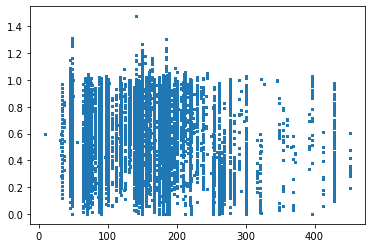

In [320]:
plt.scatter(df.SeatCapacity,df.LoadFactor,s=1)

We convert the dataset to X and y numpy arrays

In [321]:
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])
X.shape

(36768, 1562)

#### Normalization

In [322]:
X_pre = X - np.mean(X,axis=0)

normalizer = preproc.Normalizer().fit(X_pre.T)  
X_pre = normalizer.transform(X_pre.T).T

In [323]:
min_max_scaler = preproc.MinMaxScaler()

y_pre = min_max_scaler.fit_transform(y.reshape(-1,1)).reshape(-1,)

#### Check number of unique values per column

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree,metrics

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.30, random_state=42)

In [326]:
max(y_test)

0.8586538461538469

In [327]:
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

In [328]:
metrics.mean_absolute_error(y_test,ypred)

0.00010305844943765556

In [329]:
metrics.mean_squared_error(y_test,ypred)

2.6761761673367256e-08

Now we are missing some parameter-tunning for this model

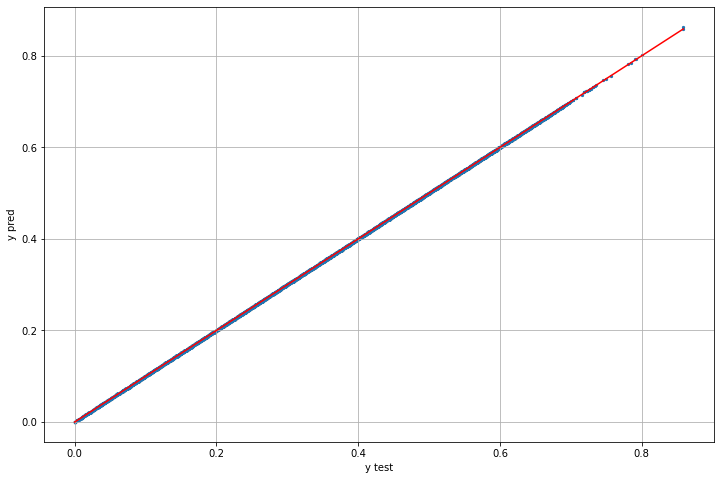

In [344]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,ypred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

We can see how the dispersion is quite high and thus the prediction far from being perfect.

- Let's try to tune some hyperparameters:

## KNN

In [119]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [347]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)
pred=model.predict(X_test)

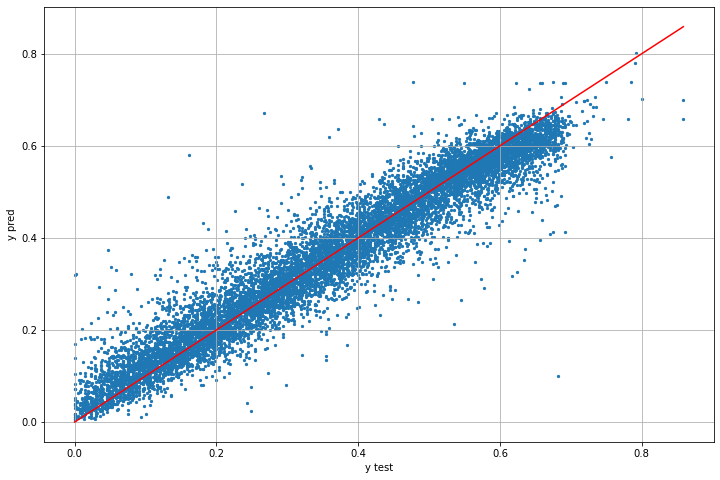

In [348]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [350]:
metrics.mean_absolute_error(y_test,pred)

0.03714550665970159

In [351]:
metrics.mean_squared_error(y_test,pred)

0.0026551117028159074

In [352]:
model = neighbors.KNeighborsRegressor(n_neighbors = 11)
model.fit(X_train, y_train)
pred=model.predict(X_test)

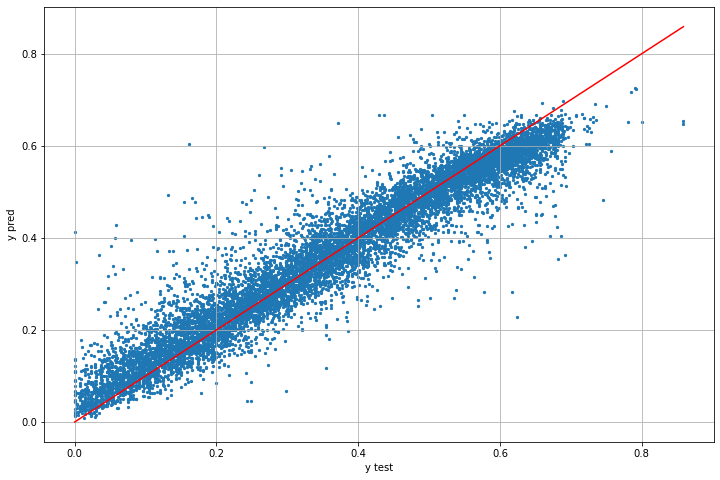

In [353]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [354]:
metrics.mean_absolute_error(y_test,pred)

0.038404100213632913

In [355]:
metrics.mean_squared_error(y_test,pred)

0.0029228708835613913

In [356]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)
pred=model.predict(X_test)

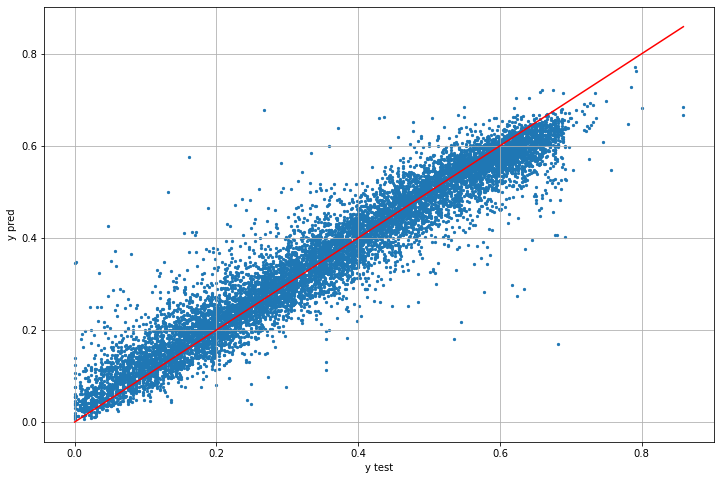

In [357]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,pred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [358]:
metrics.mean_absolute_error(y_test,pred)

0.03754186496206466

In [368]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [369]:
#Setup a response vector
N = np.shape(X)[0]
y = np.zeros(N)

K = N
kf = KFold(n_splits=K)
k_neigh = 10
Error = np.zeros((K, k_neigh))

In [370]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    for k in range(1,k_neigh+1):
        # Use Scikit KNN classifier, as you have already tried implementing it youself
        neigh = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric = 'euclidean')
        neigh.fit(X_train, y_train)
        yhat = neigh.predict(X_test)
            
        # This time i use the MAE
        Error[i-1, k-1] = sum(np.abs(y_test - yhat)) / len(yhat)
          
E = np.mean(Error, axis = 0)

fig  = plt.figure(figsize=(10,10))
plt.scatter(list(range(1,k_neigh+1)), E, marker = '*')
plt.axis([0, 11, 0.2, 0.6])
fig.suptitle("CV test error", fontsize=20)
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

KeyboardInterrupt: 

In [372]:
Error

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Setup a response vector
N = np.shape(X)[0]
y = np.zeros(N)

K = N
# Better way of doing k fold cross validation
kf = KFold(n_splits=K)
k_neigh = 10
Error = np.zeros((K, k_neigh))


for i, (train_index, test_index) in enumerate(kf.split(Xa)):
    X_train = Xa[train_index]
    y_train = y[train_index]
    X_test = Xa[test_index]
    y_test = y[test_index]

    for k in range(1,k_neigh+1):
        # Use Scikit KNN classifier, as you have already tried implementing it youself
        neigh = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', metric = 'euclidean')
        neigh.fit(X_train, y_train)
        yhat = neigh.predict(X_test)
            
        # This time i use the MAE
        Error[i-1, k-1] = sum(np.abs(y_test - yhat)) / len(yhat)
          
E = np.mean(Error, axis = 0)

fig  = plt.figure(figsize=(10,10))
plt.scatter(list(range(1,k_neigh+1)), E, marker = '*')
plt.axis([0, 11, 0.2, 0.6])
fig.suptitle("CV test error", fontsize=20)
plt.xlabel("K")
plt.ylabel("Error")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
# plt.scatter(np.sort(y_test),np.sort(ypred),s=1)
plt.scatter(y_test,ypred,s=5)
plt.xlabel('y test');plt.ylabel('y pred')
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_test)),'r')
plt.grid()
plt.show()

In [121]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.1573516216212352
RMSE value for k=  2 is: 0.13802116215681512
RMSE value for k=  3 is: 0.13172526910640348
RMSE value for k=  4 is: 0.12959658549582698
RMSE value for k=  5 is: 0.12827121290055996
RMSE value for k=  6 is: 0.12787943468864518
RMSE value for k=  7 is: 0.12797097107276761
RMSE value for k=  8 is: 0.12801307659375719
RMSE value for k=  9 is: 0.12804684128121874


KeyboardInterrupt: 

## Import future schedule

In [1]:
future=pd.read_excel('Future_Schedule.xlsx')
future

NameError: name 'pd' is not defined

In [ ]:
future=future.drop(columns=['FlightNumber'])

In [378]:
for el in future:
    print(el,sum(future[el].isnull()))

ScheduleTime 0
Airline 0
FlightNumber 0
Destination 0
AircraftType 0
FlightType 0
Sector 0
SeatCapacity 0


In [380]:
future.AircraftType=future.AircraftType.astype('str')

In [381]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(future[['Airline']]).toarray())
airline_d={}
for i in range (0,len(np.unique(data.Airline))):
    airline_d[i]=enc.categories_[0][i]
enc_df=enc_df.rename(columns=airline_d)

AttributeError: 'DataFrame' object has no attribute 'Airline'